# Finding Catherine Louisa Adams in JQA Diaries

In [1]:
import os, sys, re, requests, glob
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
import seaborn as sns


# Import project-specific functions. 
# Python files (.py) have to be in same folder to work.
lib_path = os.path.abspath(os.path.join(os.path.dirname('JQA_XML_parser.py'), '../Scripts'))
sys.path.append(lib_path)
from JQA_XML_parser import *


# Declare absolute path.
abs_dir = "/Users/quinn.wi/Documents/"

### Counting Catherine Louisa Adams's Appearances with XPath

In [2]:
%%time

# Read in file and get root of XML tree.
def get_root(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    return root

"""
Declare variables.
"""

# Declare regex to simplify file paths below
regex = re.compile(r'.*/.*/(.*.xml)')

# Declare document level of file. Requires root starting point ('.').
doc_as_xpath = './/ns:div/[@type="entry"]'

# Declare date element of each document.
date_path = './ns:bibl/ns:date/[@when]'

# Declare person elements in each document.
person_path = './/ns:p/ns:persRef/[@ref]'

# Declare text level within each document.
text_path = './ns:div/[@type="docbody"]/ns:p'

def get_cl_adams(ancestor, xpath_as_string, attrib_val_str, namespace):
    people_list = []
    for elem in ancestor.findall(xpath_as_string, namespace):
        person = elem.get(attrib_val_str)
        people_list.append(person)
#     Return a string object of 'list' to be written to output file. Can be split later.
    return ','.join(people_list)


cla_df = []

for file in glob.glob(abs_dir + 'Data/PSC/JQA/*/*.xml'):

    reFile = str(regex.search(file).group(1))
#         Call functions to create necessary variables and grab content.
    root = get_root(file)
    ns = get_namespace(root)

    for eachDoc in root.findall(doc_as_xpath, ns):
        
        for elem in eachDoc:
            entry = get_document_id(eachDoc, '{http://www.w3.org/XML/1998/namespace}id')
            date = get_date_from_attrValue(eachDoc, date_path, 'when', ns)
            
            people = get_cl_adams(eachDoc, './/ns:p/ns:persRef/[@ref = "adams-louisa-catherine"]', 'ref', ns)
            
            if people != '':
                cla_df.append([entry, date])
            else:
                pass


cla_df = pd.DataFrame(cla_df, columns = ['entry', 'date'])

cla_df = cla_df.drop_duplicates()

cla_df

CPU times: user 2.25 s, sys: 151 ms, total: 2.4 s
Wall time: 2.89 s


,entry,date
0,jqadiaries-v27-1808-12-19,1808-12-19
3,jqadiaries-v27-1808-01-01,1808-01-01
6,jqadiaries-v27-1808-01-06,1808-01-06
9,jqadiaries-v27-1808-01-07,1808-01-07
12,jqadiaries-v27-1808-01-08,1808-01-08
...,...,...
5658,jqadiaries-v28-1811-05-27,1811-05-27
5661,jqadiaries-v28-1811-05-29,1811-05-29
5664,jqadiaries-v28-1811-03-04,1811-03-04
5667,jqadiaries-v28-1811-03-12,1811-03-12


CPU times: user 47 ms, sys: 5.94 ms, total: 53 ms
Wall time: 58.9 ms


Text(0.5, 1.0, 'Appearance of Louisa Catherine Adams in JQA Diaries')

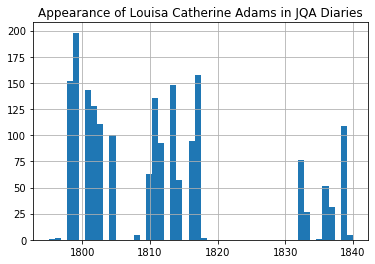

In [3]:
%%time

cla_df['date'] = pd.to_datetime(cla_df['date'])

cla_df['year'] = cla_df['date'].dt.year

ax = cla_df['year'].hist(bins = 50)

ax.set_title('Appearance of Louisa Catherine Adams in JQA Diaries')

In [4]:
fig = ax.get_figure()

fig.savefig('louisa-catherine-adams-histogram.pdf')